# Описание проекта  
  
В проекте проводится маркетинговый и продуктовый анализ развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Задача — разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

Необходимо изучить:

- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

# Описание данных  

Для работы будут использованы три датасета:

 visits_info_short.csv — хранит лог сервера с информацией о посещениях сайта,  
orders_info_short.csv — информация о заказах,  
costs_info_short.csv — информация о расходах на рекламу.  
  
- Структура visits_info_short.csv:

User Id — уникальный идентификатор пользователя,  
Region — страна пользователя,  
Device — тип устройства пользователя,  
Channel — идентификатор источника перехода,  
Session Start — дата и время начала сессии,  
Session End — дата и время окончания сессии.  

- Структура orders_info_short.csv:

User Id — уникальный идентификатор пользователя,  
Event Dt — дата и время покупки,   
Revenue — сумма заказа.  

- Структура costs_info_short.csv:

dt — дата проведения рекламной кампании,  
Channel — идентификатор рекламного источника,  
costs — расходы на эту кампанию.  

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [2]:
#импортируем необходимые библиотеки
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

visits, orders, costs = (
    pd.read_csv('/datasets/visits_info_short.csv'),
    pd.read_csv('/datasets/orders_info_short.csv'),
    pd.read_csv('/datasets/costs_info_short.csv')
)

display(visits, orders, costs)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


In [3]:
#заменим названия колонок на приемлемые 

visits.columns = [x.lower().replace(' ', '_') for x in visits.columns]
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns]
costs.columns = [x.lower().replace(' ', '_') for x in costs.columns]


In [4]:
print(visits.info())
print('_________________')
print(orders.info())
print('_________________')
print(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None
_________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None
_________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799


In [5]:
#проверим датасеты на наличие пропусков 
display(visits.isna().sum())
print('_________________')
display(orders.isna().sum())
print('_________________')
display(costs.isna().sum())

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

_________________


user_id     0
event_dt    0
revenue     0
dtype: int64

_________________


dt         0
channel    0
costs      0
dtype: int64

In [6]:
#проверим датасеты на наличие дубликатов
display(visits.duplicated().sum())
display(orders.duplicated().sum())
display(costs.duplicated().sum())

0

0

0

In [7]:
#проверим числовой столбец Revenue на аномальные значения 
display(orders['revenue'].value_counts())

4.99     38631
5.99       780
9.99       385
49.99      212
19.99      204
Name: revenue, dtype: int64

In [8]:
#заменим тип object на тип date там, где необходимо 
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

orders['event_dt'] = pd.to_datetime(orders['event_dt'])

costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [9]:
#проверим заполнение типов данных
print(visits.info())
print('_________________')
print(orders.info())
print('_________________')
print(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
None
_________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int6

In [ ]:
def inspect(df):
    display(df.head()) 
    df.info() 
    print ('Количество дубликатов -', df.duplicated().sum())
    numeric_columns=df.describe().columns
    display(df.describe())
    display()
    df.columns = [x.lower().replace(' ', '_') for x in df.columns.values]
    for column_name in df.columns:
        if column_name not in numeric_columns:
            if 'session' in column_name or 'dt' in column_name:
                df[column_name] = pd.to_datetime(df[column_name])
            else:
                display(df[column_name].value_counts())
                print(50*'*')
    return df
visits = inspect(visits)


___

#### РЕЗУЛЬТАТ ПРЕДОБРАБОТКИ ДАННЫХ 




Исходя из проверки датасетов в данных составлены следующие замечания:  


-  session_start, session_end, event_dt, dt имеют тип данных "object".   
Решение: Привести столбец к типу "date"
- Дубликатов не обнаружено
- Пропусков не обнаружено 
- Аномальных значений не обнаружено
- Для удобства столбцы были переименованы

___

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [10]:
def get_profiles(sessions, orders, ad_costs):

    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles  # возвращаем профили с CAC

____

In [11]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

____

In [12]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

____

In [13]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

____

In [14]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

____

In [15]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

____

In [16]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

____

In [17]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

_____

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Составим профили пользователей   

Определим минимальную и максимальную даты привлечения пользователей.

In [18]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [19]:
print('Минимальная дата привлечения пользователей:', profiles['dt'].min())
print('Максимальная дата привлечения пользователей:', profiles['dt'].max())

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


##### Промежуточный вывод
Пользователи привлекались с 01.05.2019 по 27.10.2019
Период соответствует указанному в задании
____

#### Определим, из каких стран пользователи приходят в приложение 
А также на какую страну приходится больше всего платящих пользователей. 
Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

,region,users,payer_ratio
0,United States,100002,6.901862
1,UK,17575,3.982930
2,France,17450,3.799427
3,Germany,14981,4.111875


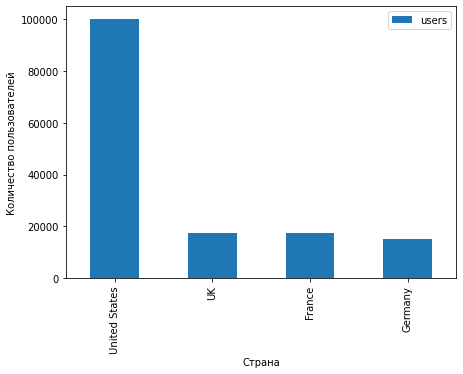

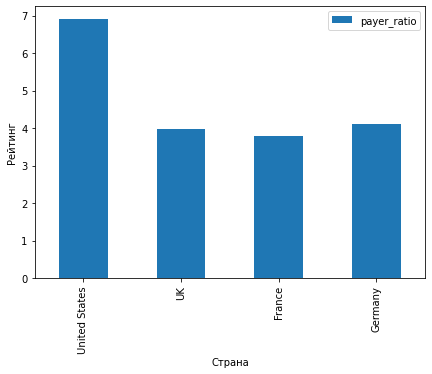

In [20]:
#сгруппируем данные по стране 
profiles_country = profiles.groupby('region').agg({'user_id':'count','payer':'mean'}).sort_values(by=['user_id','payer'], ascending=False).rename(columns={'user_id': 'users','payer':'payer_ratio'}).reset_index()
profiles_country['payer_ratio'] = profiles_country['payer_ratio'] * 100

display(profiles_country)

#визуализируем данные
profiles_country.plot(x='region', y='users', kind='bar', figsize=(7,5))
plt.xlabel('Страна')
plt.ylabel('Количество пользователей');

profiles_country.plot(x='region', y='payer_ratio', kind='bar', figsize=(7,5))
plt.xlabel('Страна')
plt.ylabel('Рейтинг');


##### Промежуточный вывод

Наибольшая доля платящих пользователей наблюдается из США - 6,9%. В США также находится наибольшее суммарное количество пользователей - 100 002. Германия, Великобритания и Франция имеют доля платящих пользователей примерно на одном уровне - 3,8-4,1%.

____

#### Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. 

Построем таблицу, отражающую количество пользователей и долю платящих для каждого устройства.


,device,users,payer_ratio
0,Mac,30042,6.364423
1,iPhone,54479,6.207897
2,Android,35032,5.851793
3,PC,30455,5.046790


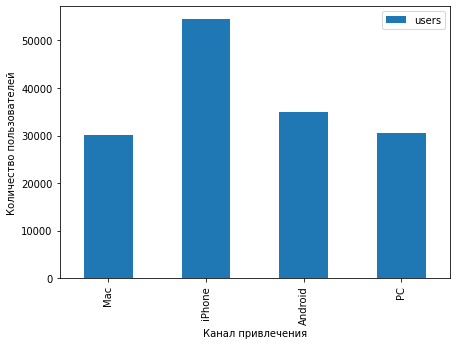

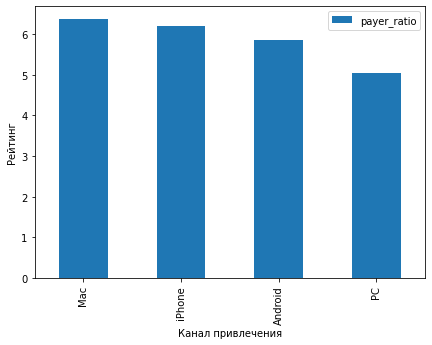

In [21]:
#сгруппируем данные по устройству 
profiles_device = profiles.groupby('device').agg({'user_id':'count','payer':'mean'}).sort_values(by=['payer'], ascending=False).rename(columns={'user_id': 'users','payer':'payer_ratio'}).reset_index()
profiles_device['payer_ratio'] = profiles_device['payer_ratio'] * 100


display(profiles_device)

#визуализируем данные
profiles_device.plot(x='device', y='users', kind='bar', figsize=(7,5))
plt.xlabel('Канал привлечения')
plt.ylabel('Количество пользователей');

profiles_device.plot(x='device', y='payer_ratio', kind='bar', figsize=(7,5))
plt.xlabel('Канал привлечения')
plt.ylabel('Рейтинг');

##### Промежуточный вывод

Пользователи используют 4 основных вида устройств входа - Mac, iPhone, Android и PC. Наибольшая доля платящих пользователей принадлежит устройствам Mac - 6,36%, наименьшая - пользователям персональных компьютеров PC - 5,05%. Наибольшее суммарное количество пользователей принадлежит группе пользователей iPhone - более 54 тыс. человек.
____

#### Изучим рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. 

Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

,channel,users,payer_ratio
0,FaceBoom,29144,12.204914
1,AdNonSense,3880,11.340206
2,lambdaMediaAds,2149,10.469986
3,TipTop,19561,9.600736
4,RocketSuperAds,4448,7.913669
5,WahooNetBanner,8553,5.296387
6,YRabbit,4312,3.826531
7,MediaTornado,4364,3.574702
8,LeapBob,8553,3.063253
9,OppleCreativeMedia,8605,2.707728


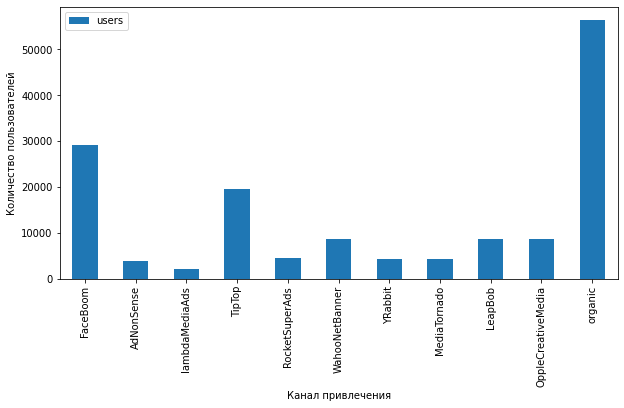

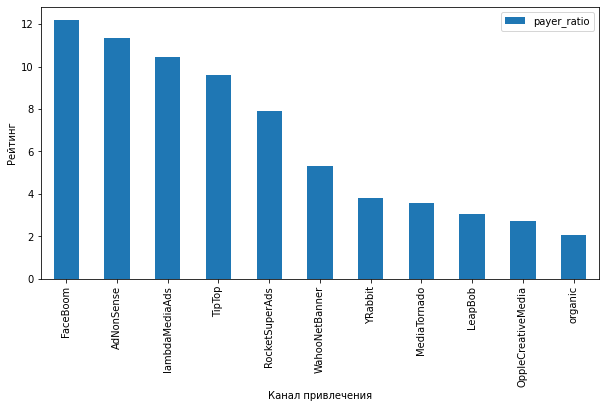

In [22]:
#сгруппируем данные по каналу привлечения 
profiles_channel = profiles.groupby('channel').agg({'user_id':'count','payer':'mean'}).sort_values(by=['payer'], ascending=False).rename(columns={'user_id': 'users','payer':'payer_ratio'}).reset_index()
profiles_channel['payer_ratio'] = profiles_channel['payer_ratio'] * 100


display(profiles_channel)

#визуализируем данные
profiles_channel.plot(x='channel', y='users', kind='bar', figsize=(10,5))
plt.xlabel('Канал привлечения')
plt.ylabel('Количество пользователей');

profiles_channel.plot(x='channel', y='payer_ratio', kind='bar', figsize=(10,5))
plt.xlabel('Канал привлечения')
plt.ylabel('Рейтинг');

##### Промежуточный вывод

Наибольшее количество платящих пользователей было привлечено через источник FaceBoom - 12,2%. Данный источник принес более 29 тыс. пользователей суммарно, что является наибольшим результатом после количества органических пользователей.

Наибольшее количество суммарных пользователей пришло самостоятельно (источник organic) - более 56 тыс. человек, однако, эта группа имеет и самую низкую долю платящих пользователей - 2%.

Наименьшее количество пользователей имеет источник lambdaMediaAds - более 2 тыс. человек, тем не менее, источник имеет достачно высокую доля платящих пользователей - 10,47%.

Наихудшие результаты из платных источников демонстрирует OppleCreativeMedia, привлекший лишь 2,7% платящих пользователей.
____

______


### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Подсчет общей суммы расходов на маркетинг

In [23]:
print('Общая сумма расходов на маркетинг:', round(costs['costs'].sum()))

Общая сумма расходов на маркетинг: 105497


#### Определение распределения трат по рекламным источникам 

,sum,percent
channel,,
TipTop,54751.30,51.9
FaceBoom,32445.60,30.8
WahooNetBanner,5151.00,4.9
AdNonSense,3911.25,3.7
OppleCreativeMedia,2151.25,2.0
RocketSuperAds,1833.00,1.7
LeapBob,1797.60,1.7
lambdaMediaAds,1557.60,1.5
MediaTornado,954.48,0.9


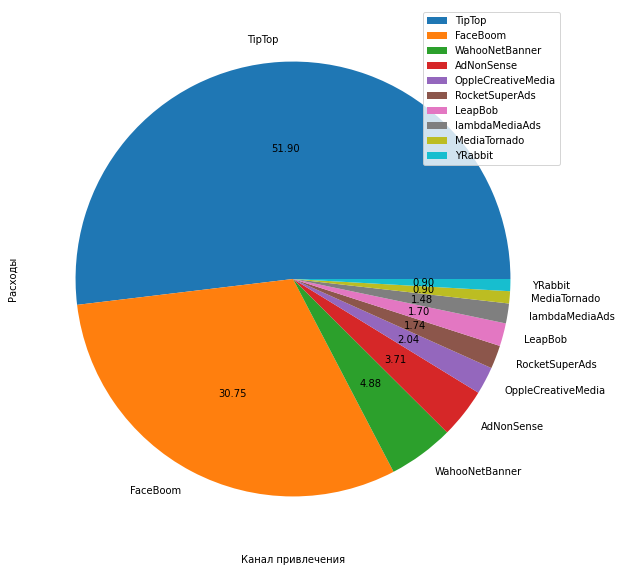

In [24]:
costs_spend = costs.groupby('channel')['costs'].agg({'sum'}).sort_values(by='sum',ascending=False)

#здесь я пытался вычислить процент значений канала в группе, но не вышло, не смог применить логику, подскаите, пожалуйста, как найти долю в группе

#costs_spend['percent'] = (len(costs_spend['sum']) / costs_spend.groupby('channel')['sum'].transform('sum')) * 100


for i in costs_spend:
    costs_spend['percent'] = ((costs_spend['sum'] / costs_spend['sum'].sum()) * 100).round(1)
#ура, получилось, додумал
    
display(costs_spend)
costs_spend.plot(y='sum', kind='pie', figsize=(10,10), autopct=('%.2f'))
plt.xlabel('Канал привлечения')
plt.ylabel('Расходы');

##### Промежуточный вывод

Наибольшая часть рекламного бюджета была потрачена на каналы TipTop (51.9%) и FaceBoom (30.8%). Суммарная доля оставшихся восьми источников не превышает 17%.

____

#### Построение визуализации динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. 

In [25]:
#построим визуализацию динамики изменения расходов во времени по каждому источнику, по неделям и месяцам
costs['dt'] = pd.to_datetime(costs['dt'])
costs_week = pd.pivot_table(costs, 
                              index=costs['dt'].dt.isocalendar().week, 
                              columns='channel', 
                              values='costs', 
                              aggfunc='sum')

costs_month = pd.pivot_table(costs, 
                               index=costs['dt'].dt.month, 
                               columns='channel', 
                               values='costs', 
                               aggfunc='sum')

display(costs_week.head())
display(costs_month.head())

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
week,,,,,,,,,,
18,211.05,535.7,16.80,38.64,24.00,99.450,347.0,49.2,52.2,81.6
19,273.00,750.2,31.71,61.68,34.50,139.230,470.0,92.4,75.9,103.2
20,265.65,755.7,26.67,59.04,27.50,138.060,454.0,90.0,69.3,90.4
21,266.70,722.7,26.67,50.16,34.25,131.040,801.8,79.2,65.4,119.2
22,202.65,1208.9,65.52,36.96,81.75,97.695,1421.2,179.4,49.8,83.2


channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
dt,,,,,,,,,,
5,1169.70,3524.4,140.28,238.56,169.75,577.980,2981.0,418.8,299.70,458.4
6,538.65,5501.1,314.58,138.00,370.00,325.715,6675.6,921.0,106.20,199.2
7,504.00,5294.3,313.53,138.48,366.50,252.070,8410.2,851.4,97.38,219.2
8,579.60,6274.4,369.81,154.56,439.25,253.110,11202.0,1040.4,124.74,220.0
9,581.70,6114.9,343.98,144.72,427.75,218.400,13232.5,977.4,152.79,247.2


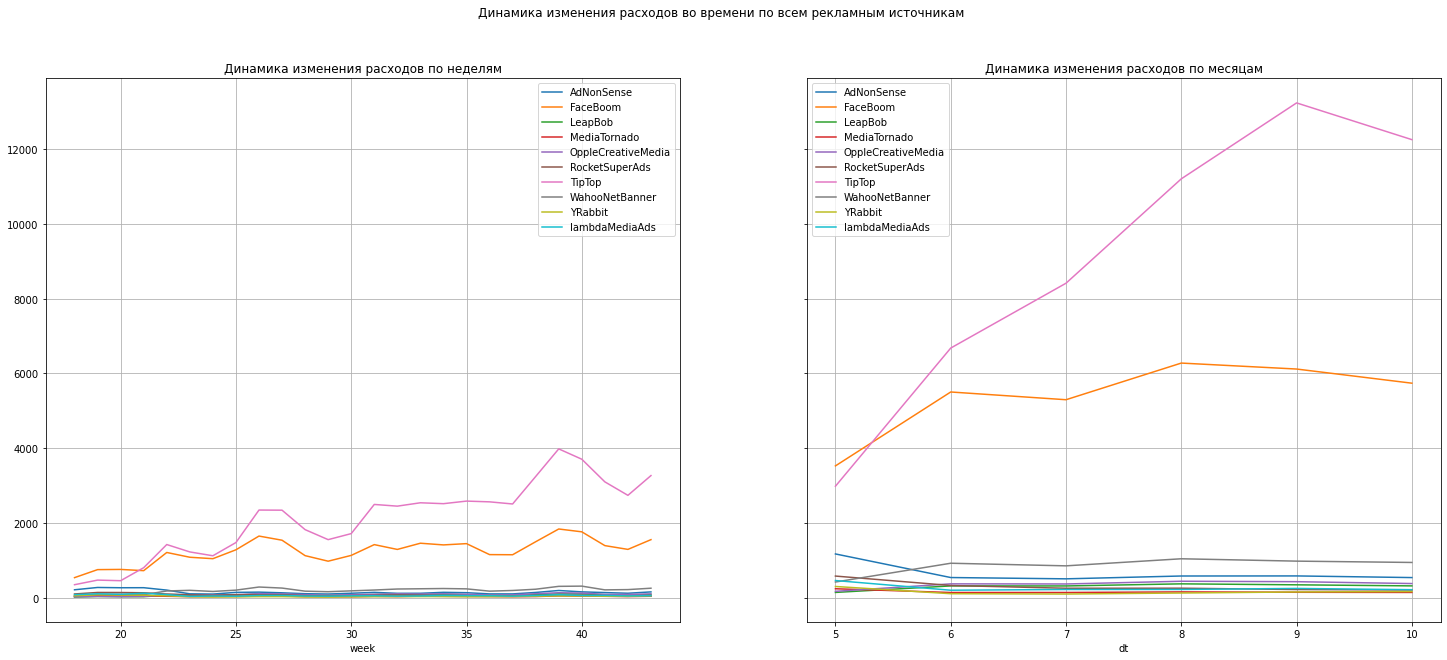

In [26]:
#игнорируем предупреждения, ибо портят
import warnings
warnings.filterwarnings("ignore")

#изобразим полученные сводные таблицы на одном графике


channels = ['AdNonSense', 'FaceBoom', 'LeapBob', 'MediaTornado',
            'OppleCreativeMedia', 'RocketSuperAds', 'TipTop', 
            'WahooNetBanner', 'YRabbit', 'lambdaMediaAds']

plt.figure(figsize=(25, 10))

for channel in channels:
    
    ax1 = plt.subplot(1, 2, 1)
    costs_week[channel].plot(grid=True, ax=ax1,)
    ax1.set_title('Динамика изменения расходов по неделям')
    ax1.legend(channels)

    ax2 = plt.subplot(1, 2, 2, sharey = ax1)
    costs_month[channel].plot(grid=True, ax=ax2)
    ax2.set_title('Динамика изменения расходов по месяцам')
    ax2.legend(channels)

plt.suptitle('Динамика изменения расходов во времени по всем рекламным источникам');

##### Промежуточный вывод
Наибольшие рекламные расходы были направлены на TipTop и Faceboom.

Чтобы детальнее рассмотреть более низкие уровни затрат, необходимо исключить из визуализации рекламные источники FaceBoom и TipTop
____

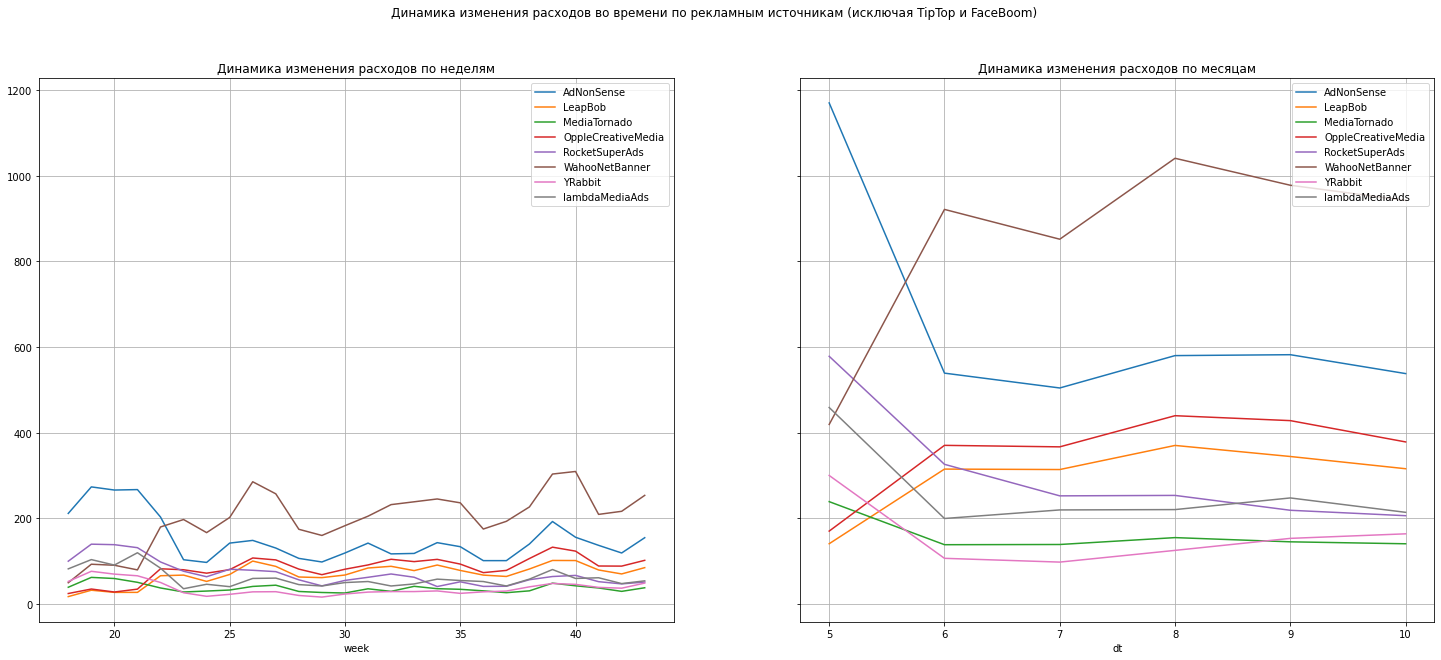

In [27]:
#исключили источники FaceBoom и TipTop
channels = ['AdNonSense', 'LeapBob', 'MediaTornado',
            'OppleCreativeMedia', 'RocketSuperAds', 
            'WahooNetBanner', 'YRabbit', 'lambdaMediaAds']

plt.figure(figsize=(25, 10))

for channel in channels:
    
    ax1 = plt.subplot(1, 2, 1)
    costs_week[channel].plot(grid=True, ax=ax1)
    ax1.set_title('Динамика изменения расходов по неделям')
    ax1.legend(channels)

    ax2 = plt.subplot(1, 2, 2, sharey = ax1)
    costs_month[channel].plot(grid=True, ax=ax2)
    ax2.set_title('Динамика изменения расходов по месяцам')
    ax2.legend(channels)

plt.suptitle('Динамика изменения расходов во времени по рекламным источникам (исключая TipTop и FaceBoom)');

##### Промежуточный вывод
В остальных рекламных источниках наблюдается схожая динамика расходов.
____

#### Определение средней стоимости привлечения одного пользователя (CAC) из каждого источника. 

In [28]:
#воспользуемся профилями пользователей profiles
profiles.groupby('channel')['acquisition_cost'].mean().sort_values(ascending=False)

channel
TipTop                2.799003
FaceBoom              1.113286
AdNonSense            1.008054
lambdaMediaAds        0.724802
WahooNetBanner        0.602245
RocketSuperAds        0.412095
OppleCreativeMedia    0.250000
YRabbit               0.218975
MediaTornado          0.218717
LeapBob               0.210172
organic               0.000000
Name: acquisition_cost, dtype: float64

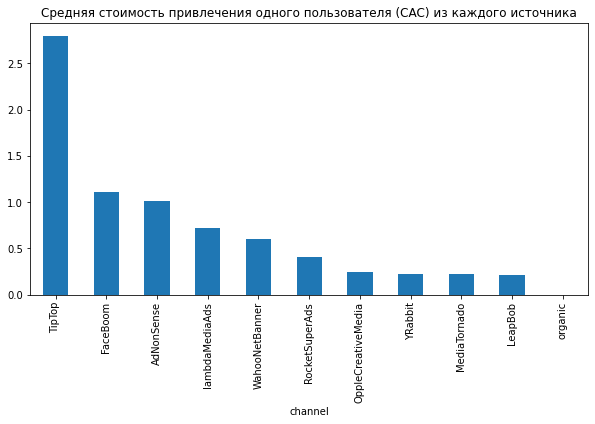

In [29]:
plt.figure(figsize=(10, 5))
profiles.groupby('channel')['acquisition_cost'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Средняя стоимость привлечения одного пользователя (CAC) из каждого источника');

##### Промежуточный вывод

Самый дорогой рекламный канал - канал TipTop.   
Самые недорогие рекламные каналы - YRabbit, MediaTornado, LeapBob.
____



____

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

#### Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [30]:
#определим параметры анализа:
#момент анализа
observation_date = datetime(2019, 11, 1).date()
#горизонт анализа - 14 дней
horizon_days = 14

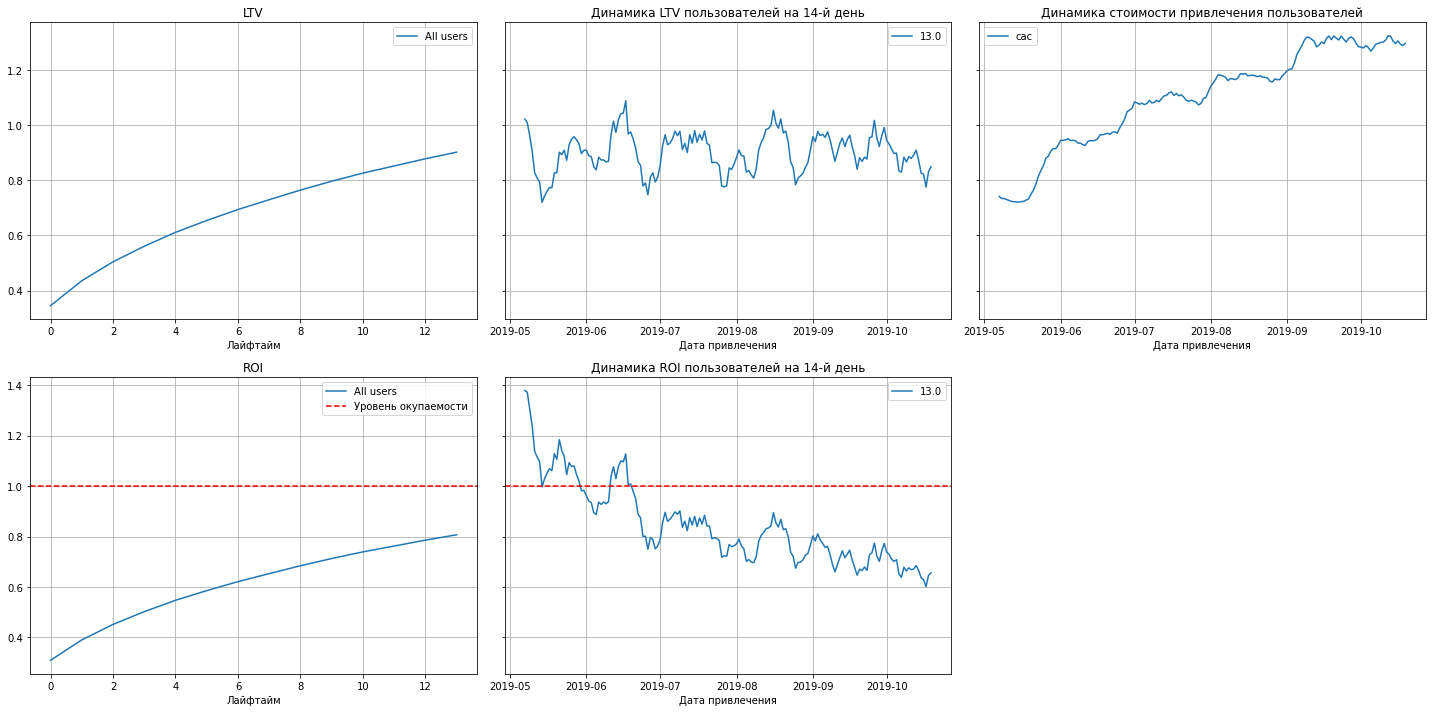

In [31]:
#рассчитаем LTV и ROI, исключив из profiles пользователей из рекламного канала organic, так как средства на него не были потрачены
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles[profiles['channel'] != 'organic'], orders, observation_date, horizon_days
)
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

##### Промежуточный вывод

- Реклама не окупается - ROI не превышает уровня окупаемости, что, вероятно, вызвано увеличением рекламного бюджета.
- Динамика стоимости привлечения пользователей (CAC) показывала постоянный рост рекламных расходов: с уровня 0.8 в мае до 1.2 в октябре.
- Динамика LTV пользователей на 14-й день лайфтайма показывает относительно стабильные колебания на уровне 0.8-1.0 в период с мая по октябрь без характерных проявлений сезонного фактора.
- Динамика ROI свидетельствует о том, что реклама перестала окупаться в конце мая - начале июня.

____

#### Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.

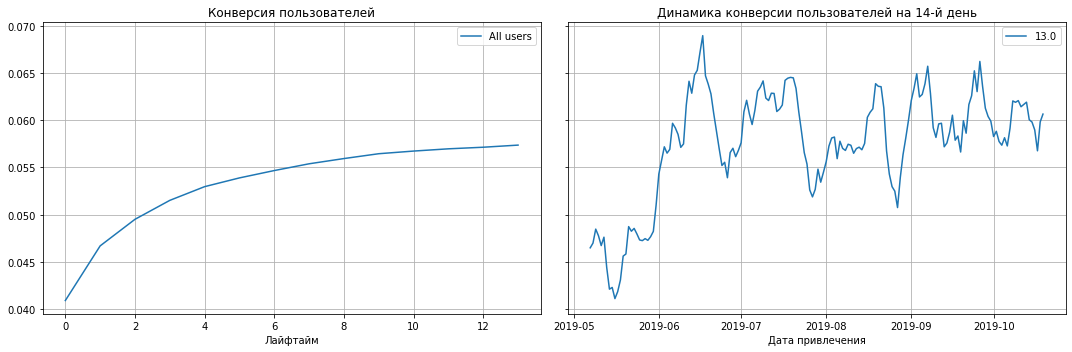

In [32]:
#рассчитаем и построим график конверсии
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=[]
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

##### Промежуточный вывод

Показатели конверсии стабильны. После двухнедельного срока конверсия составляет более 0.055.
____

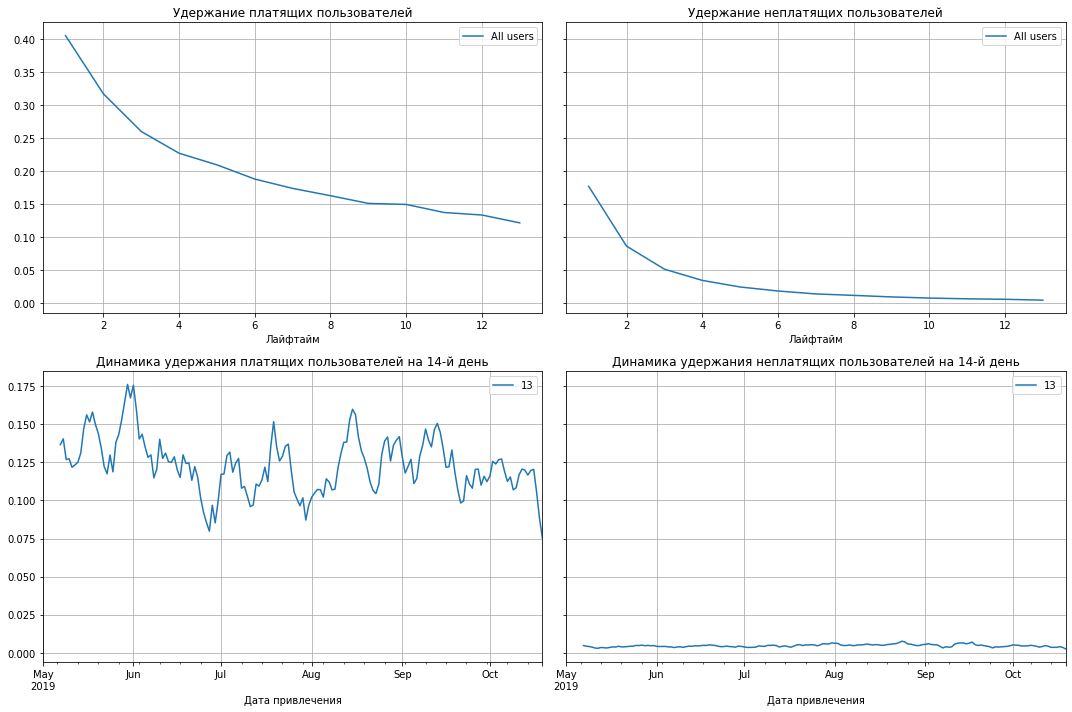

In [33]:
#рассчитаем и построим график удержания
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=[]
)

plot_retention(retention_grouped, retention_history, horizon_days)

##### Промежуточный вывод

Как видно из графика, неплатящие пользователи удерживаются гораздо хуже, чем платящие, что свидетельствует о верном поведении кривых конверсии.
____

#### Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

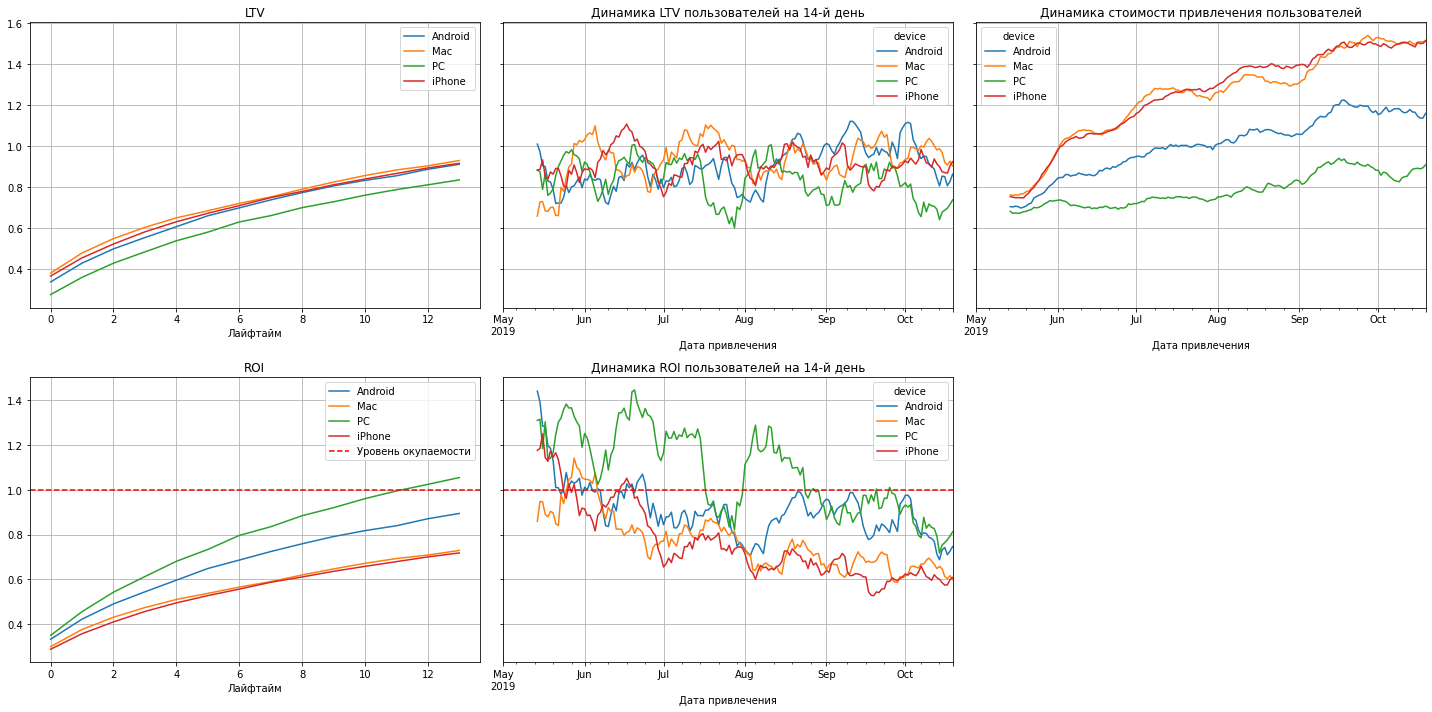

In [34]:
#проверим окупаемость с разбивкой по устройствам (без organic)
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles[profiles['channel'] != 'organic'], orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

##### Промежуточный вывод

- Пользователи PC имеют сравнительно меньший LTV, чем все остальные клиенты.
- Реклама окупается только для пользователей PC на 11-й день лайфтайма. Для пользователей Android, Mac, iPhone - реклама не окупается в двухнедельный срок.
- Сильнее всего увеличивался рекламный бюджет для привлечения пользователей Mac и iPhone - с уровня 0.8 в мае до 1.4 в октябре. Меньше всего выросла стоимость привлечения пользователей PC.
- Наибольшую окупаемость рекламы демонстрировали пользователи PC в период с мая по сентябрь. Все остальные пользователи последний раз окупались в мае.
_____

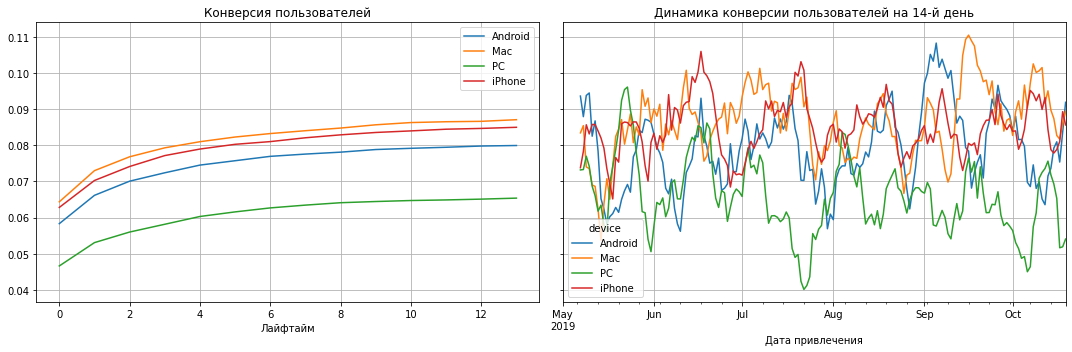

In [35]:
#проверим конверсию с разбивкой по устройствам (без organic)
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles[profiles['channel'] != 'organic'], orders, observation_date, horizon_days, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

##### Промежуточный вывод

Пользователи PC демонстрируют наиболее низкую конверсию. Возможно, это связано в какими-то техническими проблемами при прохождении этапов покупки. Рассмотрим удержание пользователей в разрезе устройств.
____

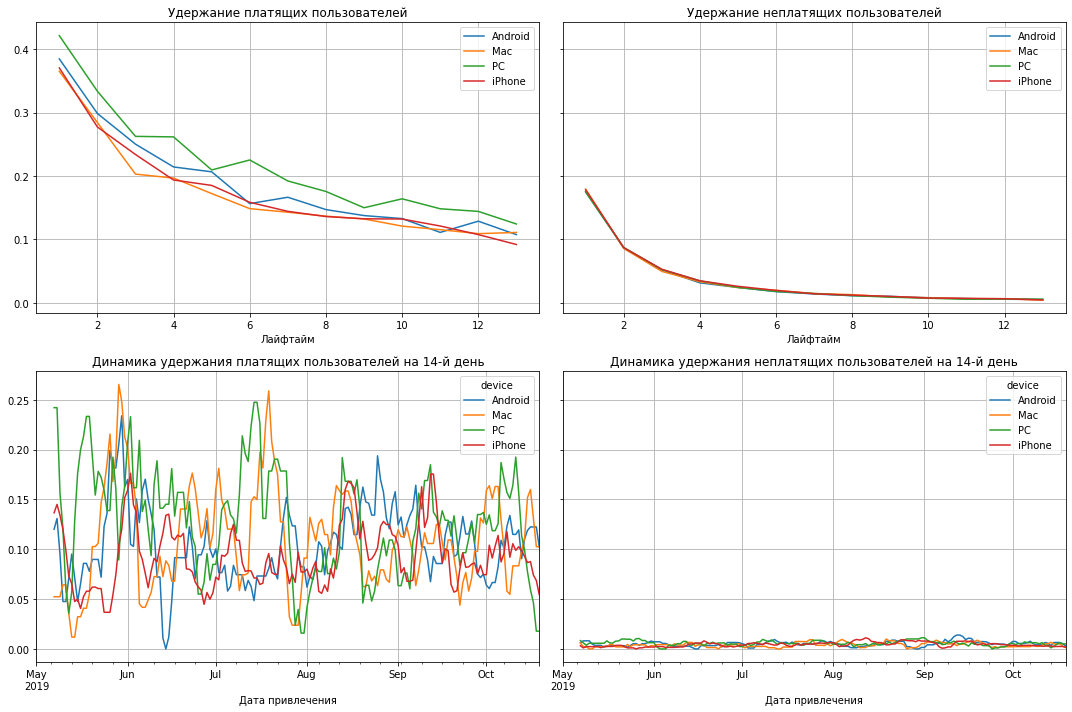

In [36]:
#проверим удержание с разбивкой по устройствам (без organic)
retention_raw, retention_grouped, retention_history = get_retention(
    profiles[profiles['channel'] != 'organic'], visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days)

##### Промежуточный вывод

Среди пользователей всех устройств не наблюдается значительных различий в метрике удержания. Это означает, что причина неокупаемости рекламы, скорее всего, связана не с типами устройств привлеченных пользователей, а с другими факторами.
____

#### Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

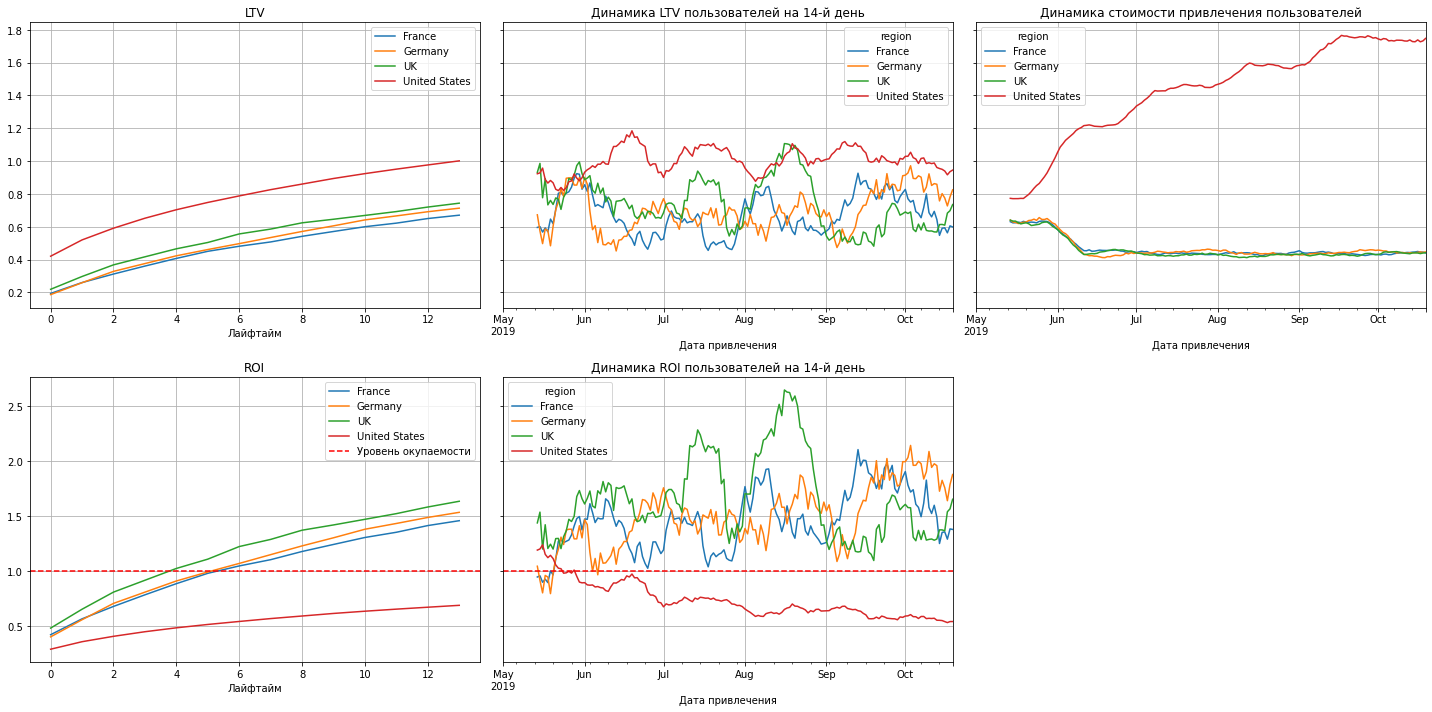

In [37]:
#проверим окупаемость с разбивкой по странам (без organic)
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles[profiles['channel'] != 'organic'], orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)


##### Промежуточный вывод

- Наибольший уровень LTV показывают пользователи из США, все остальные страны сравнительно на одном уровне.
- Стоимость привлечения пользователей из США является самой дорогой, что также связано с постоянным расширением рекламного бюджета. В июне стоимость привлечения пользователей из Франции, Германии и Великобритании была снижена до стабильного уровня 0.4.
- Реклама в США убыточна весь период с июня по октябрь. Все остальные источники окупаются на 4-5 день лайфтайма и окупались в течение года.

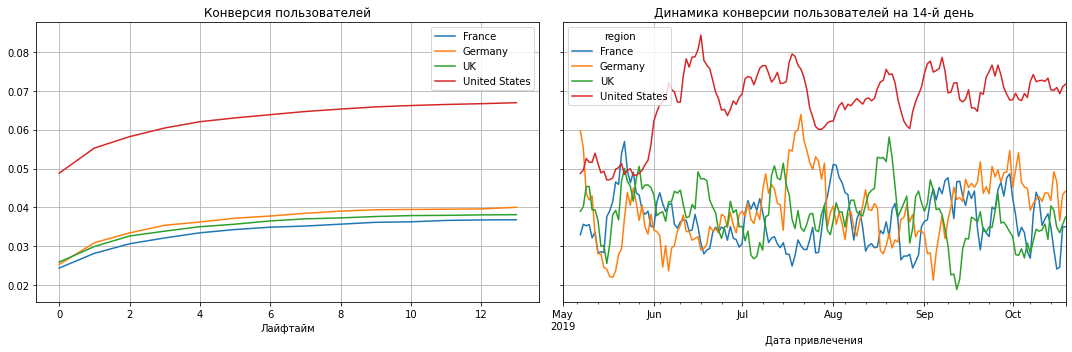

In [38]:
#проверим конверсию с разбивкой по странам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

##### Промежуточный вывод

С конверсией пользователей в США нет никаких проблем - она намного лучше, чем во всех остальных регионах. Конверсия остальных стран наблюдается на одном уровне.  
Скорее всего, причина неокупаемости рекламы в США кроется в удержании пользователей.

___

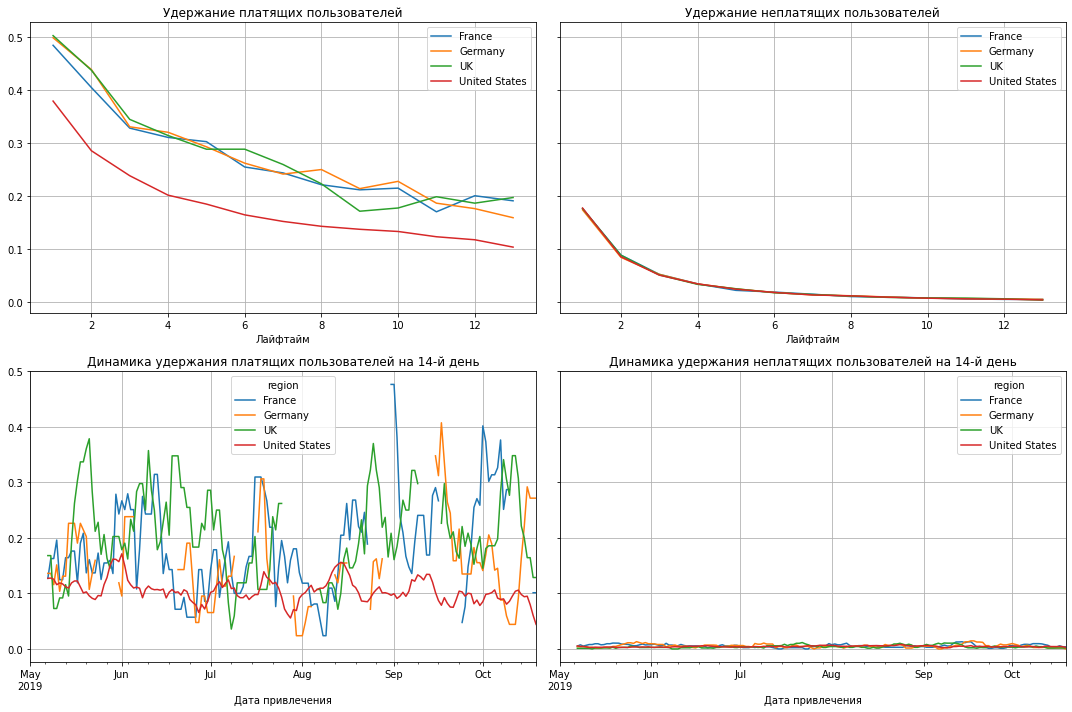

In [39]:
#проверим удержание с разбивкой по странам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days)


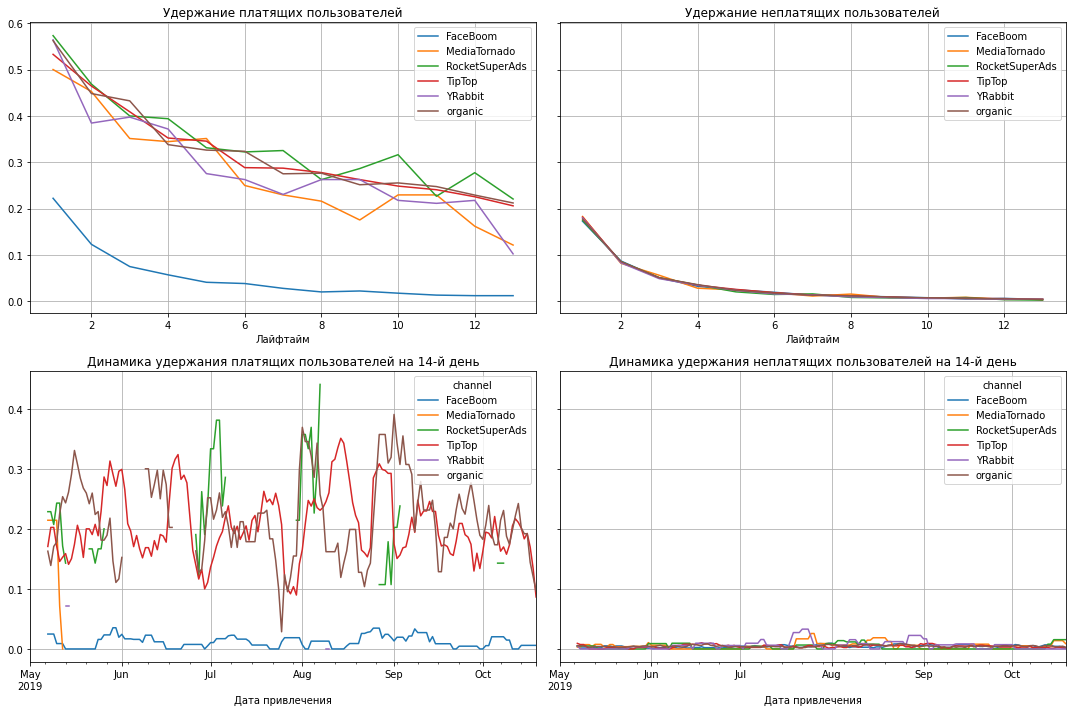

In [40]:
#проверим удержание по US
retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('region == "United States"'), visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days)

##### Промежуточный вывод

Насколько можно судить из полученных данных, по каналам  US налюдается адекватное распределение удержания по всем каналам, кроме канала FaceBoom, так как он занимает значительный процент в данных (30.8%) вероятнее всего именно он влияет на показатели


##### Промежуточный вывод

Насколько видно из полученных данных, действительно, удержание платящих клиентов в США - самое низкое по сравнению с другими странами. Причина убыточности рекламы - слабое удержание пользователей. Вместо затрат на привлечение новых пользователей из США, следует проводить работу над их удержанием и повышением лояльности.

___

#### Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

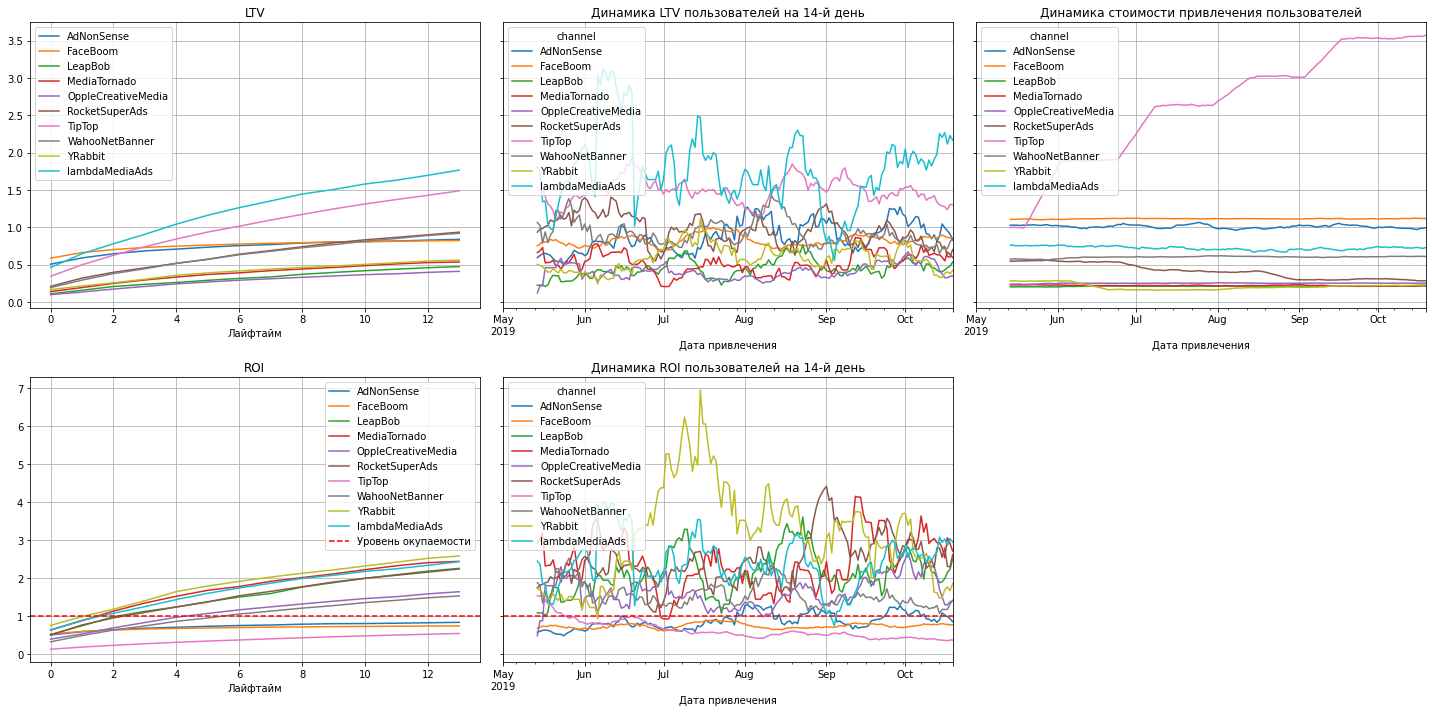

In [41]:
#проверим окупаемость с разбивкой по рекламным каналам (без organic)
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles[profiles['channel'] != 'organic'], orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)


##### Промежуточный вывод

- Из рекламных источников не окупаются - lambdaMediaAds, Faceboom и TipTop.
- Пользователи, привлеченные через данные три источника - показывают наибольший LTV
- Стоимость привлечения пользователей была стабильна для всех источников, кроме TipTop - его рекламный бюджет постоянно увеличивался с 1.0 в мае до 3.5 в октябре.
- Самую высокую динамику ROI демонстрировал YRabbit в июле.
____

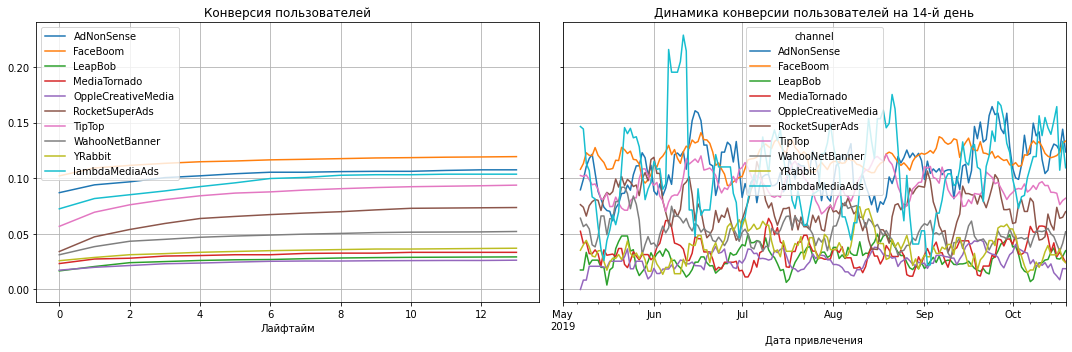

In [42]:
#проверим конверсию с разбивкой по рекламным каналам (без organic)
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles[profiles['channel'] != 'organic'], orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

##### Промежуточный вывод

Убыточные каналы TipTop, Faceboom и lambdaMediaAds имеют высокую, уверенную конверсию на фоне всех источников. Faceboom имеет самую высокую конверсию. Посмотрим, кроется ли причина неокупаемости в удержании этих каналов.
____

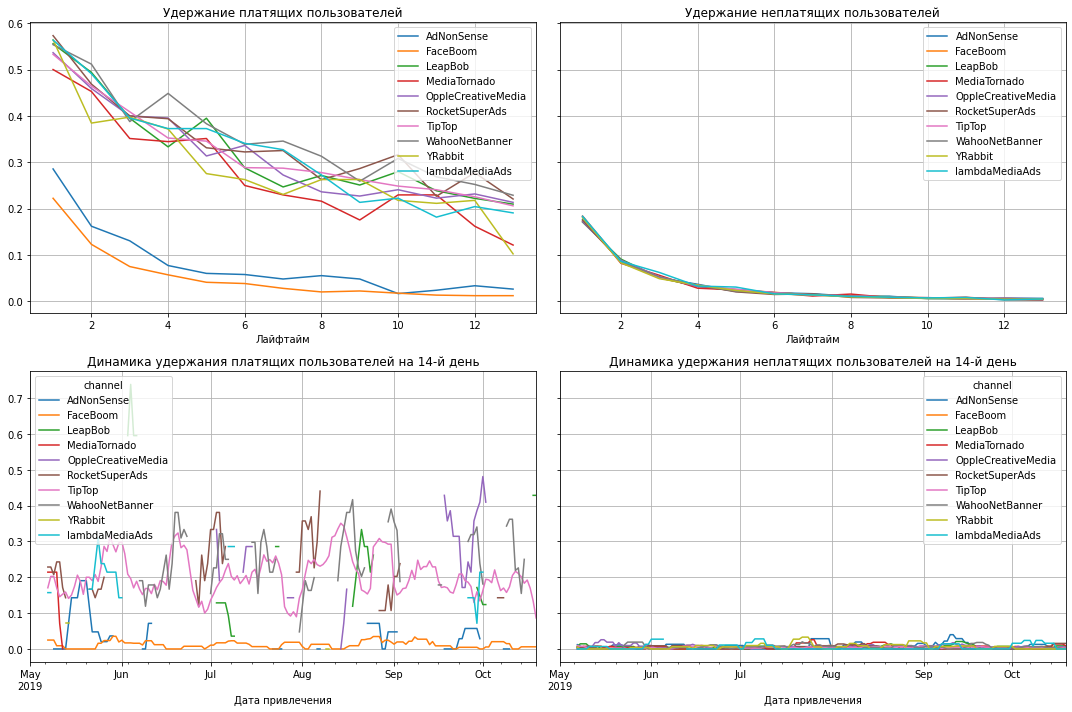

In [43]:
#проверим удержание с разбивкой по рекламным каналам (без organic)
retention_raw, retention_grouped, retention_history = get_retention(
    profiles[profiles['channel'] != 'organic'], visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days)

##### Промежуточный вывод

Насколько видно из полученных данных, наихудшее удержание привлеченных пользователей демонстрируют каналы Faceboom и AdNonSense. Чтобы решить проблему убыточности данных каналов, необходимо больше работать над удержанием уже имеющихся клиентов, поскольку эти источники имеют достаточную конверсию. Снижение затрат на привлечение новых пользователей из этих каналов поможет решить проблему неокупаемости рекламы.

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

# Выводы

В процессе исследования были сделаны следующие выводы:

- Наибольшая доля платящих пользователей наблюдается из США - 6,9%. В США также находится наибольшее суммарное количество пользователей - 100 002. Германия, Великобритания и Франция имеют доля платящих пользователей на уровне 3,8-4,1%.
- Пользователи используют 4 основных вида устройств входа - Mac, iPhone, Android и PC. Наибольшая доля платящих пользователей принадлежит устройствам Mac - 6,36%, наименьшая - пользователям персональных компьютеров PC - 5,05%. Наибольшее суммарное количество пользователей принадлежит группе пользователей iPhone - более 54 тыс. человек.
- Наибольшее количество платящих пользователей было привлечено через источник FaceBoom - 12,2%. Данный источник принес более 29 тыс. пользователей суммарно, что является наибольшим результатом после количества органических пользователей.
- Наихудшие результаты демонстрирует источник OppleCreativeMedia, привлекший лишь 2,7% платящих пользователей.
- Наибольшее количество суммарных пользователей пришло самостоятельно (источник organic) - более 56 тыс. человек, однако, эта группа имеет и самую низкую долю платящих пользователей - 2%.
- Наименьшее количество пользователей имеет источник lambdaMediaAds - более 2 тыс. человек, тем не менее, источник имеет достачно высокую доля платящих пользователей - 10,47%.
- Общая сумма расходов на маркетинг составляет 105 497.
- Наибольшая часть рекламного бюджета была потрачена на каналы TipTop (51.9%) и FaceBoom (30.8%). Суммарная доля оставшихся восьми источников не превышает 17% бюджета.
- Реклама не окупается - ROI не превышает уровня окупаемости, что, вероятно, вызвано увеличением рекламного бюджета.
- Динамика стоимости привлечения пользователей (CAC) показывала постоянный рост рекламных расходов: с уровня 0.8 в мае до 1.2 в октябре.
- Динамика LTV пользователей на 14-й день лайфтайма показывает относительно стабильные колебания на уровне 0.8-1.0 в период с мая по октябрь без характерных проявлений сезонного фактора.
- Динамика ROI свидетельствует о том, что реклама перестала окупаться в конце мая - начале июня.
- Показатели конверсии стабильны. После двухнедельного срока конверсия составляет более 0.055.
- Хуже всего конвертируются пользователи платформы PC по сравнению с другими устройствами.
- Пользователи PC имеют сравнительно меньший LTV, чем все остальные клиенты.
- Реклама окупается только для пользователей PC на 11-й день лайфтайма. Для пользователей Android, Mac, iPhone - реклама не окупается в двухнедельный срок.
- Сильнее всего увеличивался рекламный бюджет для привлечения пользователей Mac и iPhone - с уровня 0.8 в мае до 1.4 в октябре. Меньше всего выросла стоимость привлечения пользователей PC.
- Наибольшую окупаемость рекламы демонстрировали пользователи PC в период с мая по сентябрь. Все остальные пользователи последний раз окупались в мае.
- Наибольший уровень LTV показывают пользователи из США, все остальные страны сравнительно на одном уровне.
- Стоимость привлечения пользователей из США является самой дорогой, что также связано с постоянным расширением рекламного бюджета. В июне стоимость привлечения пользователей из Франции, Германии и Великобритании была снижена до стабильного уровня 0.4.
- Реклама в США убыточна весь период с июня по октябрь. Все остальные источники окупаются на 4-5 день лайфтайма и окупались в течение года.
- Из рекламных источников не окупаются - lambdaMediaAds, Faceboom и TipTop.
- Пользователи, привлеченные через данные три источника - показывают наибольший LTV
- Стоимость привлечения пользователей была стабильна для всех источников, кроме TipTop - его рекламный бюджет постоянно увеличивался с 1.0 в мае до 3.5 в октябре.
- Самую высокую динамику ROI демонстрировал YRabbit в июле.

Подводя итог можно заключить, что реклама не окупается, поскольку в различных сегментах рекламы имеются достаточно убыточные каналы привлечения. К наиболее убыточным рекламным каналам, которые ухудшают общую окупаемость, относятся:

- пользователи из США на устройствах iPhone и Mac
- пользователи мобильных устройств
- каналы привлечения TipTop, FaceBoom, lambdaMediaAds.

Пользователи из перечисленных каналов демонстрируют хорошие показатели конверсии, удержания и LTV, однако, данные каналы являются дорогими и их привлечение требует больших рекламных бюджетов, от чего реклама теряет окупаемость в целом. Удержание платящих клиентов в США - самое низкое по сравнению с другими странами. Причина убыточности рекламы - слабое удержание пользователей.

Чтобы достигнуть окупаемости общей рекламы возможны следующие меры:

- необходимо больше работать над удержанием уже имеющихся пользователей из Faceboom и AdNonSense, поскольку эти источники имеют достаточную конверсию. Снижение затрат на привлечение новых пользователей из этих каналов поможет решить проблему неокупаемости рекламы.
- уменьшить рекламный бюджет в убыточные источники TipTop, FaceBoom, lambdaMediaAds, OppleCreativeMedia и перенаправить освободившиеся средства на каналы с наибольшим ROI - YRabbit, MediaTornado, RocketSuperAds.
- вместо привлечения новых пользователей из США, следует проводить работу над их удержанием и повышением лояльности.
- уменьшить рекламный бюджет сегмента пользователей iPhone и Mac из США и перенаправить освободившиемся средства на европейские каналы Германии, Франции и Великобритании.
- увеличить рекламный бюджет для пользователей PC и Android.

